#Lab 1.3 - Análise de Complexidade#
Objetivos:
- Compreender (talvez revisar) alguns dos pontos relevantes ao se analisar a complexidade (desempenho) de algoritmos

Objetivos secundários:
- Continuar exercício com raciocínio sobre algoritmos e estruturas básicas para organização e recuperação de informação
- Continuar experiências com Python e Gráficos

Atividades / Passos:
- Geração de dados aleatórios
- Observar um algoritmo e primeira análise
- Medição por tempo e por "número de instruções"
- Realizando experimentos
- Analisando gráfico e performance
- Analisando as ordens de complexidade típicas

# **Passo 1 : Geração de números aleatórios em uma lista ("vetor")**
- Compreender a geração de números aleatórios, sobretudo o uso do seed (semente)
- Gerar e manipular uma lista com N elementos

In [6]:
# Compreendendo a geração de números aleatórios
# Questão: Qual diferença ao usar o random.seed() dentro ou fora do FOR?
# Questão: Em duas ou mais execuções os números aleatórios serão diferentes?
import random
random.seed(0)
for i in range(5):
    print(random.randint(1, 1000000))

885441
403959
794773
933489
441002


In [7]:
# Criando um vetor (lista) com
#     - N elementos (tamanho),
#     - dentro de uma faixa de valores (limite) e
#     - sempre com uma mesma sequência (seed)

import random

def GeradorDados(tamanho, limite, seed):
    dados = []
    random.seed(seed)
    for i in range(tamanho):
        dados.append(random.randint(1, limite))

    return dados


In [8]:
# Gerando e manipulando os dados
N   = 1000    # Quantidade de números no vetor
LIM = 1000   # Limite para geração do número aleatório
S   = 2         # Seed: para manter sempre uma mesma sequência

dados = GeradorDados(N, LIM, S)

print(" Tamanho da lista: " + str(len(dados)))
print(" Lista: ")
print(dados[0:20])


 Tamanho da lista: 1000
 Lista: 
[979, 884, 971, 870, 58, 94, 87, 370, 856, 174, 754, 829, 686, 875, 316, 258, 621, 218, 622, 37]


# **Passo 2 : Observe a função**
- Observe a função a seguir
- O que ela está realizando?
- De forma rápida, qual a ordem de complexidade dela?





In [9]:
import time

def Funcao(lista):

  ult = len(lista)-1
  for i in range(ult, 1, -1):
      for j in range(0, i-1):
          if ( lista[j] > lista[j+1] ):
               aux        = lista[j]
               lista[j]   = lista[j+1]
               lista[j+1] = aux


In [10]:
l = [4, 6, 1, 3, 9]
print(l)
Funcao(l)
print(l)

[4, 6, 1, 3, 9]
[1, 3, 4, 6, 9]


# **Passo 3 : Experimente a função**

- Apresente uma proposta para analisar a performance do algoritmos por experimentos
- a) Qual a característica (tamanho) do problema que impacta no número de instruções e protanto na performance?
- b) Como contar as instruções?
- c) Como medir o tempo?
- d) Como derivar a função de complexidade?
- e) Qual a ordem de complexidade em questão?


In [13]:

Instr = 0

def FuncaoInstr(lista):
  global Instr
  Instr += 4
  ult = len(lista)-1
  for i in range(ult, 1, -1):
      Instr += 3
      for j in range(0, i-1):
          Instr += 4
          if ( lista[j] > lista[j+1] ):
               Instr += 3
               aux        = lista[j]
               lista[j]   = lista[j+1]
               lista[j+1] = aux

  print("[Instruções: " + str(Instr)+" | Tamanho da lista: " + str(len(lista)) + "]")

# **Passo 4 : Medir o esforço computacional da função**
- Varie a propriedade do problema para valores por exemplo de 10, 50, 100, 500, 1000, 10000
- Recupere os resultados da execução para posterior análise gráfica


In [ ]:
dadosTeste1 = GeradorDados(10, 10, S)
dadosTeste2 = GeradorDados(50, 50, S)
dadosTeste3 = GeradorDados(100, 100, S)
dadosTeste4 = GeradorDados(500, 500, S)
dadosTeste5 = GeradorDados(1000, 1000, S)
dadosTeste6 = GeradorDados(10000, 10000, S)

FuncaoInstr(dadosTeste1)
FuncaoInstr(dadosTeste2)
FuncaoInstr(dadosTeste3)
FuncaoInstr(dadosTeste4)
FuncaoInstr(dadosTeste5)
FuncaoInstr(dadosTeste6)

[Instruções: 193 | Tamanho da lista: 10]
[Instruções: 6797 | Tamanho da lista: 50]
[Instruções: 32508 | Tamanho da lista: 100]
[Instruções: 729877 | Tamanho da lista: 500]
[Instruções: 3478670 | Tamanho da lista: 1000]


In [ ]:
[Instruções: 193 | Tamanho da lista: 10]
[Instruções: 6797 | Tamanho da lista: 50]
[Instruções: 32508 | Tamanho da lista: 100]
[Instruções: 729877 | Tamanho da lista: 500]
[Instruções: 3478670 | Tamanho da lista: 1000]

# **Passo 5: Analisar o gráfico do experimento**
- Com os resultados dos experimentos analise o gráfico de performance.
- Compare com os gráficos de pesquisa binária e de pesquisa binária

In [20]:
# Questão: Verifique de o Pandas e o Dataframe são muito usados em ciência de dados?
#          Imagine como seria um gráfico (Tempo vs Posição da Chave) e (Número de Instruções vs Posição)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Analisando graficamente

# Gerando um Dataframe, isso ajudará na produção dos gráficos
# Veremos mais sobre Dataframes e Gráficos em próximos capítulos
df = pd.DataFrame(lstresults, columns =['Chave', 'Existe', 'Posicao', 'Tempo', 'Instrucoes'])

# Criando o ambiente do gráfico
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
graf_linha = sns.lineplot(data = df, x="Posicao", y="Instrucoes",
                          color="red", marker="*", markersize=10, markers="True")
plt.show()


ValueError: 5 columns passed, passed data had 6 columns

# **Passo 6: Análise gráfica das principais ordens de complexidade**
- Para cada função das principais ordens de complexidade, avalie um valor com N variando entre 2 4 6 8 10 20 40 60 80 100
- Plote o gráfico contendo todas elas e compare a complexidade.
- Se for necessário exclua algumas para facilitar a comparação entre elas




In [18]:
import math

valores_n = [2,4,6,8,10,20,40,60,80,100]
# valores_n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

linha   = []
lstresults = []

for n in valores_n:
    vlog = math.log(n, 2)
    vn   = n
    vn_2 = math.pow(n, 2)
    vn_3 = math.pow(n, 3)
    v2_n = math.pow(2, n)

    linha = [n, vlog, vn, vn_2, vn_3, v2_n]
    lstresults.append(linha)

print(lstresults)


[[2, 1.0, 2, 4.0, 8.0, 4.0], [4, 2.0, 4, 16.0, 64.0, 16.0], [6, 2.584962500721156, 6, 36.0, 216.0, 64.0], [8, 3.0, 8, 64.0, 512.0, 256.0], [10, 3.3219280948873626, 10, 100.0, 1000.0, 1024.0], [20, 4.321928094887363, 20, 400.0, 8000.0, 1048576.0], [40, 5.321928094887363, 40, 1600.0, 64000.0, 1099511627776.0], [60, 5.906890595608519, 60, 3600.0, 216000.0, 1.152921504606847e+18], [80, 6.321928094887362, 80, 6400.0, 512000.0, 1.2089258196146292e+24], [100, 6.643856189774725, 100, 10000.0, 1000000.0, 1.2676506002282294e+30]]


c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anton\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

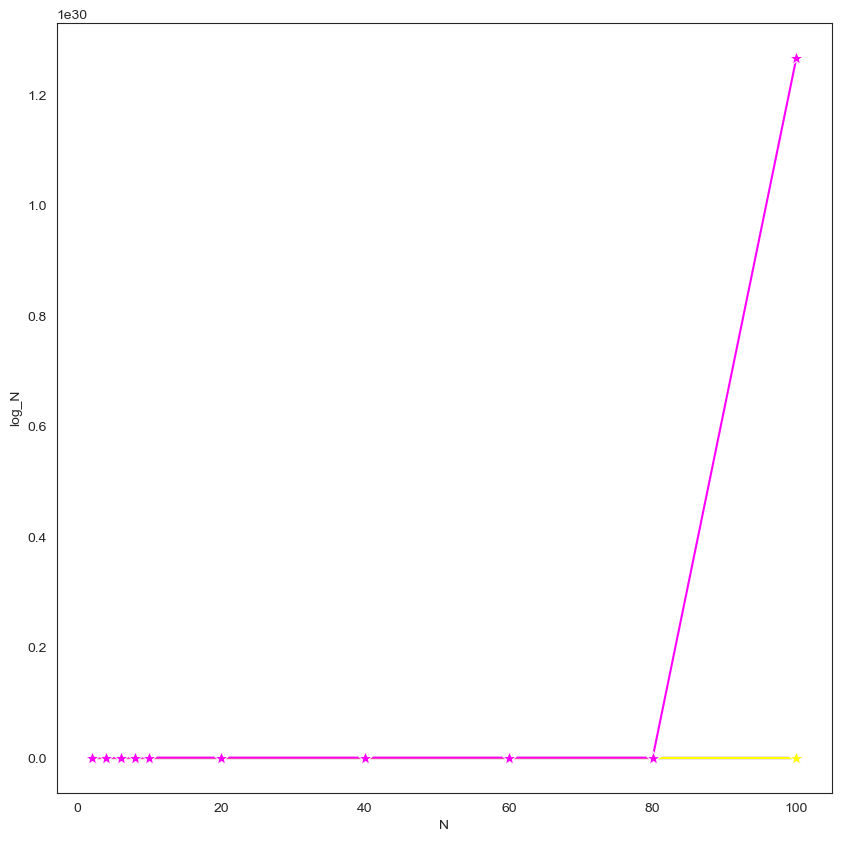

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Analisando graficamente

# Gerando um Dataframe, isso ajudará na produção dos gráficos
# Veremos mais sobre Dataframes e Gráficos em próximos capítulos
df = pd.DataFrame(lstresults, columns =['N', 'log_N', 'N_1', 'N_2', 'N_3', '2_N'])

# Criando o ambiente do gráfico
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
graf_linha = sns.lineplot(data = df, x="N", y="log_N",
                          color="red", marker="*", markersize=10, markers="True")
graf_linha = sns.lineplot(data = df, x="N", y="N_1",
                          color="blue", marker="*", markersize=10, markers="True")
graf_linha = sns.lineplot(data = df, x="N", y="N_2",
                          color="green", marker="*", markersize=10, markers="True")
graf_linha = sns.lineplot(data = df, x="N", y="N_3",
                          color="yellow", marker="*", markersize=10, markers="True")
graf_linha = sns.lineplot(data = df, x="N", y="2_N",
                          color="magenta", marker="*", markersize=10, markers="True")
plt.show()
